In [31]:
import pandas as pd
import numpy as np
import retrieval, visual, tools
import plotly.express as px
import cufflinks as cf
cf.set_config_file(theme='white', sharing='public',offline=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Single stock

In [32]:
TICKER = "PLTR"
start_date='2020-01-01'
end_date='2024-01-01'

In [33]:
pltr_df = retrieval.single_stock(TICKER, start_date, end_date)
pltr_df.head()

[*********************100%***********************]  1 of 1 completed


Date   Open   High   Low  Close  Adj Close     Volume  Daily Return  \
0 2020-09-30  10.00  11.41  9.11   9.50       9.50  338584400      0.000000   
1 2020-10-01   9.69  10.10  9.23   9.46       9.46  124297600     -0.421052   
2 2020-10-02   9.06   9.28  8.94   9.20       9.20   55018300     -2.748417   
3 2020-10-05   9.43   9.49  8.92   9.03       9.03   36316900     -1.847827   
4 2020-10-06   9.04  10.18  8.90   9.90       9.90   90864000      9.634551   

                  Trend  
0  Insignificant Change  
1       Negative Change  
2       Negative Change  
3       Negative Change  
4              Bull Run

In [34]:
count_df = pltr_df.groupby(['Trend'])['Date'].count().reset_index().rename(columns={'Date':'Counts'})

In [35]:
fig = px.pie(count_df, values='Counts', names='Trend', title=f'{TICKER}: Trend Breakdown')
fig.show()

In [36]:
# Plot High, Low, Open, Close and Adj Close
visual.plot_financial_data(pltr_df.drop(['Volume', 'Daily Return', 'Trend'], axis = 1), f'{TICKER}: Stock Price [$]')

In [37]:
pltr_df.set_index(['Date']).iplot(kind="candle", keys=["Open", "High", "Low", "Close"]) #rangeslider=True

In [38]:
# Plot Candlestick figure using Cufflinks QuantFig module
figure = cf.QuantFig(pltr_df.set_index(['Date']), title = f'{TICKER}: Candlestick Chart', name = TICKER)
figure.add_sma(periods =[14, 21], column = 'Close', color = ['magenta', 'green'])
figure.iplot(theme = 'white', up_color = 'green', down_color = 'red')

## Multiple stocks

In [7]:
TICKER_LIST = ['AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA', 'GOOGL']
start_date='2020-01-01'
end_date='2024-01-01'

In [8]:
mag7_df, mag7_return_df = retrieval.multiple_stock(TICKER_LIST, start_date, end_date)
mag7_df.head()

[*********************100%***********************]  7 of 7 completed


Ticker        Date       AAPL       AMZN      GOOGL        META        MSFT  \
0       2020-01-02  72.876129  94.900497  68.264961  209.150269  153.938202   
1       2020-01-03  72.167610  93.748497  67.907852  208.043610  152.021408   
2       2020-01-06  72.742661  95.143997  69.717865  211.961807  152.414352   
3       2020-01-07  72.400528  95.343002  69.583206  212.420410  151.024689   
4       2020-01-08  73.565193  94.598503  70.078476  214.573944  153.430237   

Ticker      NVDA       TSLA  
0       5.973123  28.684000  
1       5.877517  29.534000  
2       5.902164  30.102667  
3       5.973621  31.270666  
4       5.984824  32.809334

In [9]:
mag7_return_df.head()

Ticker        Date      AAPL      AMZN     GOOGL      META      MSFT  \
0       2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000   
1       2020-01-03 -0.972224 -1.213903 -0.523122 -0.529121 -1.245171   
2       2020-01-06  0.796826  1.488557  2.665395  1.883354  0.258480   
3       2020-01-07 -0.470333  0.209162 -0.193148  0.216361 -0.911767   
4       2020-01-08  1.608642 -0.780864  0.711766  1.013807  1.592818   

Ticker      NVDA      TSLA  
0       0.000000  0.000000  
1      -1.600593  2.963326  
2       0.419348  1.925464  
3       1.210690  3.880052  
4       0.187538  4.920483

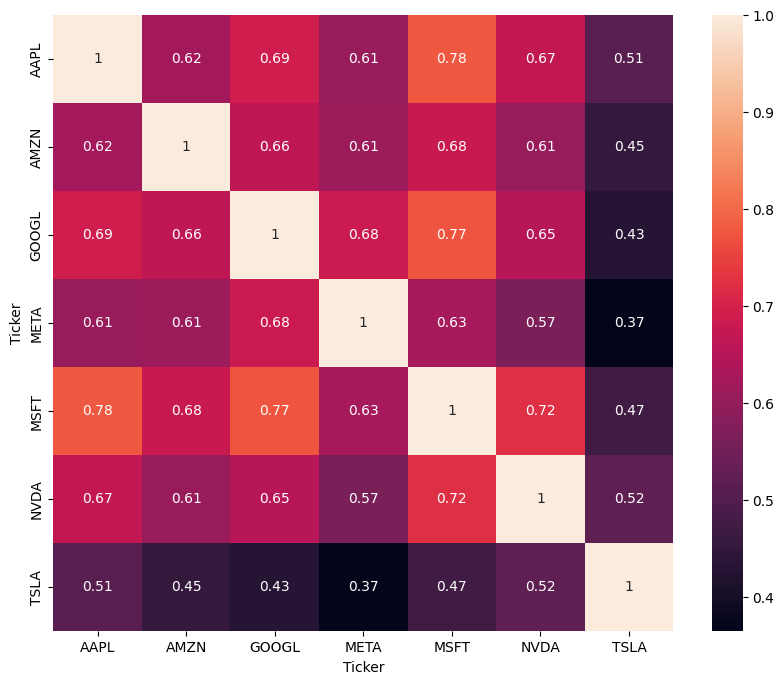

In [10]:
visual.plot_financial_data(mag7_df, 'Adjusted Closing Prices [$]')
visual.plot_histogram_data(mag7_return_df)
visual.plot_heatmap_data(mag7_return_df)

In [11]:
visual.plot_financial_data(tools.price_scaling(mag7_df), 'Scaled Returns')

In [12]:
number_of_stocks = len(mag7_df.columns) - 1
weights = tools.generate_portfolio_weights(number_of_stocks)

In [13]:
portfolio_df = tools.asset_allocation(mag7_df, weights, initial_investment=100000)

In [14]:
visual.plot_financial_data(portfolio_df[['Date', 'Portfolio Daily Return [%]']], 'Portfolio Percentage Daily Return [%]')
visual.plot_financial_data(portfolio_df.drop(['Portfolio Value [$]', 'Portfolio Daily Return [%]'], axis = 1), 'Portfolio positions [$]')
visual.plot_financial_data(portfolio_df[['Date', 'Portfolio Value [$]']], 'Total Portfolio Value [$]')

In [15]:
portfolio_metrics = tools.simulation_engine(mag7_df, weights, initial_investment=100000, rf=0.03)

print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))

Expected Portfolio Annual Return = 36.38%
Portfolio Standard Deviation (Volatility) = 35.26%
Sharpe Ratio = 0.95
Portfolio Final Value = $371489.45
Return on Investment = 271.49%


In [16]:
##### Monte Carlo Simulations #####

# Set the number of simulation runs
sim_runs = 10000
initial_investment = 1000000
rf = 0.03

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, number_of_stocks))

# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)

# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)

# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)

# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)

# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    # Generate random weights 
    weights = tools.generate_portfolio_weights(number_of_stocks)
    # Store the weights
    weights_runs[i,:] = weights
    
    # Call "simulation_engine" function and store Sharpe ratio, return and volatility
    # Note that asset allocation is performed using the "asset_allocation" function  
    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = tools.simulation_engine(mag7_df, weights, initial_investment, rf)
    print("Simulation Run = {}".format(i))   
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))

Simulation Run = 0
Weights = [0.052 0.103 0.127 0.209 0.321 0.015 0.174], Final Value = $3322084.67, Sharpe Ratio = 0.93
Simulation Run = 1
Weights = [0.095 0.033 0.24  0.23  0.082 0.207 0.113], Final Value = $4073275.03, Sharpe Ratio = 1.01
Simulation Run = 2
Weights = [0.183 0.16  0.106 0.138 0.181 0.178 0.055], Final Value = $3574493.97, Sharpe Ratio = 0.95
Simulation Run = 3
Weights = [0.22  0.132 0.068 0.218 0.044 0.021 0.297], Final Value = $4151134.35, Sharpe Ratio = 1.02
Simulation Run = 4
Weights = [0.009 0.248 0.024 0.205 0.149 0.074 0.291], Final Value = $4308726.91, Sharpe Ratio = 1.01
Simulation Run = 5
Weights = [0.229 0.107 0.13  0.184 0.102 0.031 0.217], Final Value = $3734854.88, Sharpe Ratio = 0.99
Simulation Run = 6
Weights = [0.204 0.033 0.207 0.034 0.093 0.202 0.227], Final Value = $4939783.95, Sharpe Ratio = 1.15
Simulation Run = 7
Weights = [0.118 0.004 0.058 0.223 0.25  0.239 0.108], Final Value = $4338587.98, Sharpe Ratio = 1.05
Simulation Run = 8
Weights = [0.

In [17]:
# Obtain the portfolio weights that correspond to the maximum Sharpe ratio (Golden set of weights!)
weights_runs[sharpe_ratio_runs.argmax(), :]

array([0.24022236, 0.01635541, 0.02997577, 0.03821599, 0.06230924,
       0.29997626, 0.31294498])

In [18]:
# Return Sharpe ratio, volatility corresponding to the best weights allocation (maximum Sharpe ratio)
optimal_portfolio_return, optimal_volatility, optimal_sharpe_ratio, highest_final_value, optimal_return_on_investment = tools.simulation_engine(mag7_df, weights_runs[sharpe_ratio_runs.argmax(), :], initial_investment, rf)

In [19]:
print(f'Best Portfolio Metrics Based on {sim_runs} Monte Carlo Simulation Runs:')
print(f'  - Portfolio Expected Annual Return = {optimal_portfolio_return * 100:.02f}%')
print(f'  - Portfolio Standard Deviation (Volatility) = {optimal_volatility * 100:.02f}%')
print(f'  - Sharpe Ratio = {optimal_sharpe_ratio:.02f}')
print(f'  - Final Value = ${highest_final_value:.02f}')
print(f'  - Return on Investment = {optimal_return_on_investment:.02f}%')

Best Portfolio Metrics Based on 10000 Monte Carlo Simulation Runs:
  - Portfolio Expected Annual Return = 55.35%
  - Portfolio Standard Deviation (Volatility) = 42.36%
  - Sharpe Ratio = 1.24
  - Final Value = $6132926.08
  - Return on Investment = 513.29%


In [20]:
# Create a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist()})
sim_out_df

Volatility  Portfolio_Return  Sharpe_Ratio
0       0.342913          0.348584      0.929055
1       0.363431          0.396889      1.009516
2       0.341346          0.355882      0.954696
3       0.379891          0.415730      1.015370
4       0.387671          0.421010      1.008613
...          ...               ...           ...
9995    0.339527          0.359769      0.971259
9996    0.340107          0.372312      1.006484
9997    0.373207          0.456685      1.143292
9998    0.369115          0.442230      1.116808
9999    0.378348          0.452608      1.116983

[10000 rows x 3 columns]

In [21]:
# Plot volatility vs. return for all simulation runs
# Highlight the volatility and return that corresponds to the highest Sharpe ratio
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.update_layout({'plot_bgcolor': "white"})
fig.show()


In [22]:
# Let's highlight the point with the highest Sharpe ratio
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.add_trace(go.Scatter(x = [optimal_volatility], y = [optimal_portfolio_return], mode = 'markers', name = 'Optimal Point', marker = dict(size=[40], color = 'red')))
fig.update_layout(coloraxis_colorbar = dict(y = 0.7, dtick = 5))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()